In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import vdfpy

sns.set_theme(rc={'figure.figsize':(10, 3)})

In [11]:
from vdfpy.generator import make_clusters

df = make_clusters(n_clusters=3, n_dims=1, n_points=100, n_samples=20)
#df

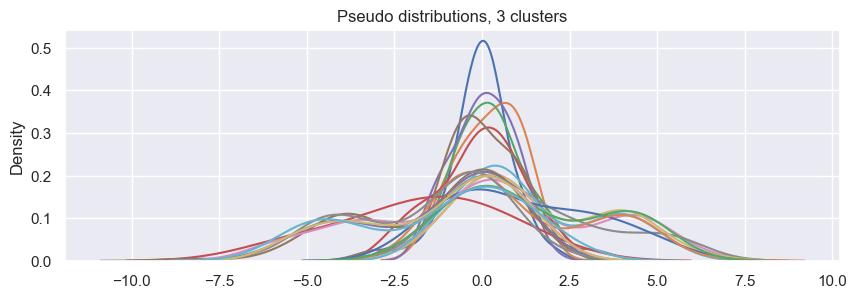

In [12]:
hp = sns.kdeplot(df["particle velocity"][0])
[sns.kdeplot(d,) for d in df["particle velocity"][1:]]
hp.set(title="Pseudo distributions, 3 clusters");

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale the moments
data_scaled = scaler.fit_transform(df.iloc[:, 1:])
df_scaled = pd.DataFrame(data_scaled)
df_scaled

,0,1,2
0,0.271630,-0.044918,-1.721160
1,-1.539234,0.190163,-1.842636
2,0.699195,0.094478,-1.362722
3,-0.784708,-0.089147,-1.088038
4,0.171026,0.013373,-1.721451
5,-1.061367,0.040491,-1.207213
6,-0.482897,1.313950,0.647216
7,-0.885311,1.140508,0.524533
8,0.171026,1.345800,0.490072
9,1.101609,1.143133,0.329220


In [14]:
method = "GMM"
labels = vdfpy.cluster(df_scaled, n_clusters=3, method=method)

# clusters: 3; # samples: 20; # features 3



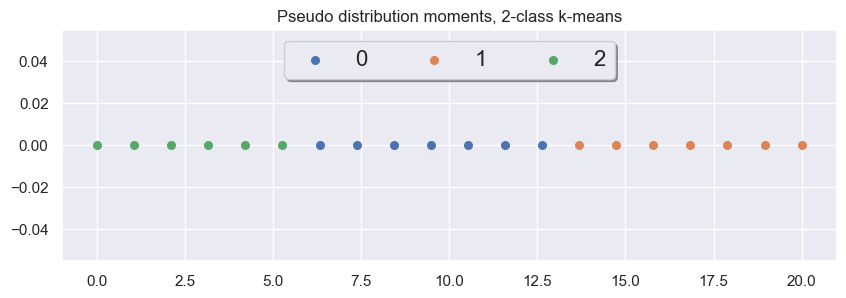

In [15]:
xrange = np.linspace(0, labels.size, labels.size)
ylocs = np.zeros(labels.size)

fig, ax = plt.subplots(figsize=(10, 3))

for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(xrange[ix], ylocs[ix], label=g, s=30)

ax.legend(loc="upper center", fancybox=True, shadow=True, ncol=4, fontsize=16)
ax.set_title('Pseudo distribution moments, 2-class k-means')

plt.show()